**Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Implimentation**

📦 مرحله 1: نصب کتابخانه‌ها

In [ ]:
!pip install roboflow
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 135.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 117.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.6 MB/s eta 0:00:00
  

📥 مرحله 2: دانلود تصاویر خام از Roboflow

In [ ]:
from roboflow import Roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="4B97i6P7vkstoPXiG4du")
project = rf.workspace("emotions-dectection").project("human-face-emotions")
version = project.version(30)
dataset = version.download("coco")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Human-face-emotions-30 in coco:: 100%|██████████| 9408/9408 [00:01<00:00, 5645.81it/s]


**مرحله 2-2: بررسی مسیر فایل های دانلود شده**

In [ ]:
import os

def print_directory_summary(root_path):
    for root, dirs, files in os.walk(root_path):
        level = root.replace(root_path, '').count(os.sep)
        indent = '  ' * level
        print(f"{indent}📁 {os.path.basename(root)}/")

        # فقط اگر فایل هست (مثلاً تصاویر)، تعدادش رو بنویس
        if files:
            sub_indent = '  ' * (level + 1)
            print(f"{sub_indent}📄 {len(files)} فایل")

# استفاده:
print_directory_summary(dataset.location)


📁 Human-face-emotions-30/
  📄 2 فایل
  📁 test/
    📄 942 فایل
  📁 train/
    📄 6587 فایل
  📁 valid/
    📄 1874 فایل


📷 مرحله 3: نمایش چند تصویر از دیتاست

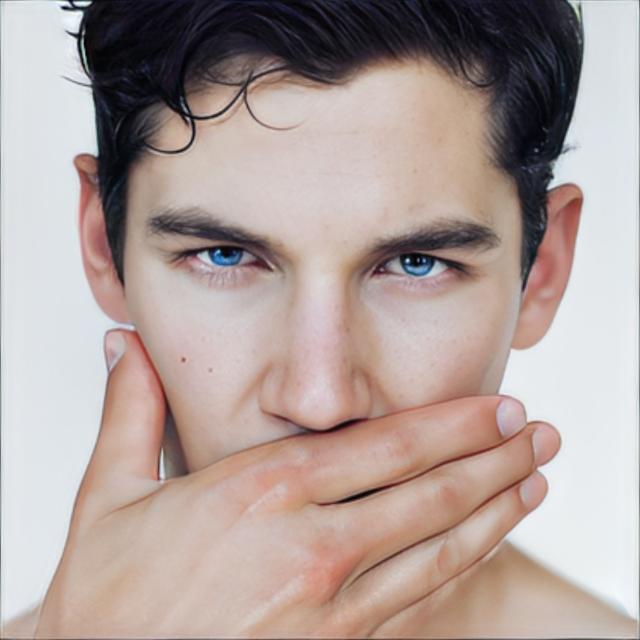

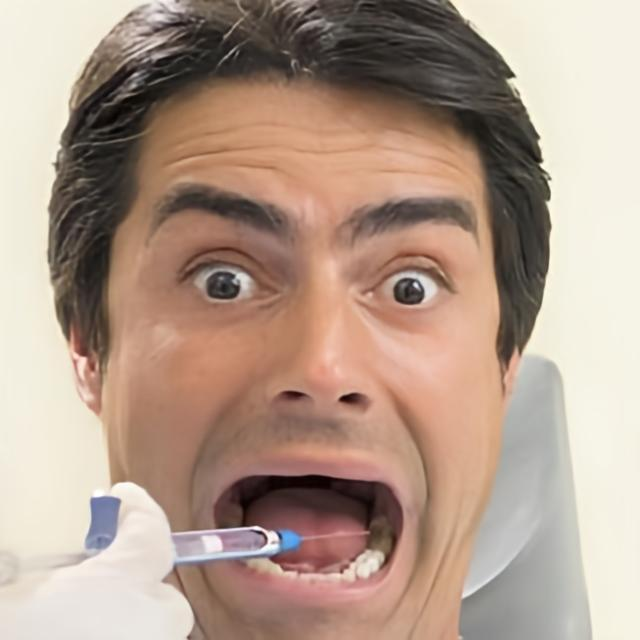

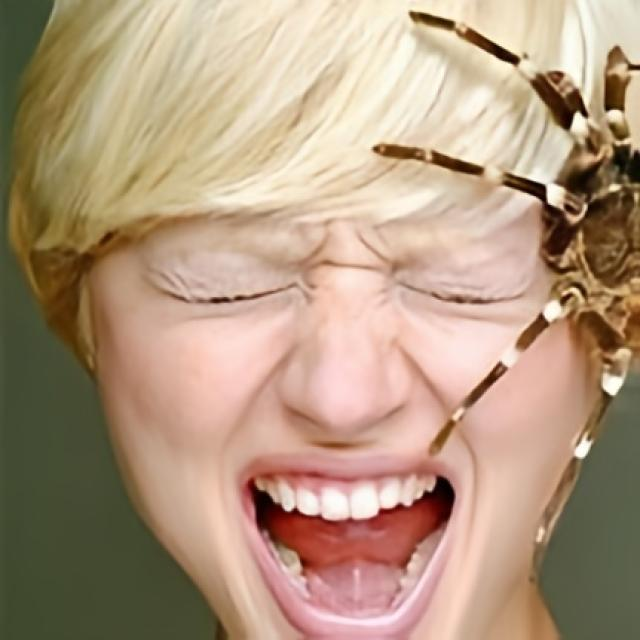

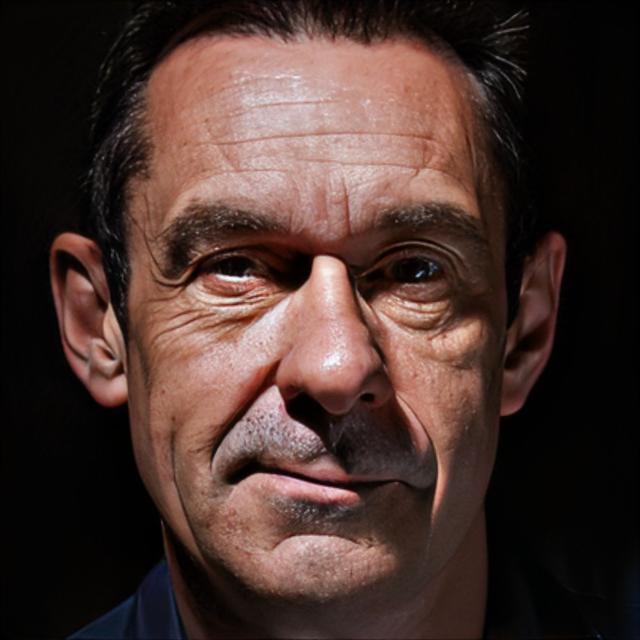

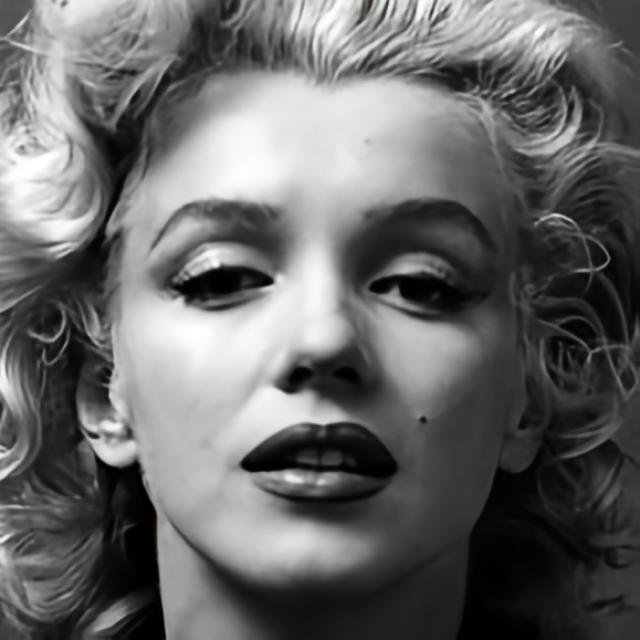

In [ ]:
import os
from IPython.display import Image, display

image_dir = "/content/Human-face-emotions-30/train"  # مسیر درست
image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# نمایش 5 تصویر اول
for img in image_files[:5]:
    display(Image(filename=os.path.join(image_dir, img)))


**مرحله4: یکسان سازی ابعاد تصاویر **

In [ ]:
from PIL import Image
import os

def resize_images_in_folder(input_folder, output_folder, size=(640, 640)):
    os.makedirs(output_folder, exist_ok=True)
    for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(input_folder, filename)
            img = Image.open(img_path).convert("RGB")
            img = img.resize(size)
            img.save(os.path.join(output_folder, filename))

# resize برای هر پوشه
base_input = "/content/Human-face-emotions-30"
base_output = "/content/Human-face-emotions-30-resized"

for subfolder in ["train", "valid", "test"]:
    in_path = os.path.join(base_input, subfolder)
    out_path = os.path.join(base_output, subfolder)
    resize_images_in_folder(in_path, out_path, size=(640, 640))

print("✅ تمام تصاویر به 640x640 resize شدند و در مسیر جدید ذخیره شدند.")


✅ تمام تصاویر به 640x640 resize شدند و در مسیر جدید ذخیره شدند.


**مرحله5: انتخاب 300 تصویر تصادفی و دانلود و آپلود در roboflow و لیبل گذاری**

In [ ]:
import os
import random
import shutil

source_dir = "/content/Human-face-emotions-30-resized/train"
output_dir = "/content/selected_images_for_labeling"
os.makedirs(output_dir, exist_ok=True)

# انتخاب تصادفی 300 تصویر
all_images = [f for f in os.listdir(source_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
selected_images = random.sample(all_images, 300)

for img in selected_images:
    shutil.copy(os.path.join(source_dir, img), os.path.join(output_dir, img))

print(f"{len(selected_images)} تصویر در {output_dir} ذخیره شدند.")

300 تصویر در /content/selected_images_for_labeling ذخیره شدند.


In [ ]:
!zip -r /content/images_for_labeling.zip /content/selected_images_for_labeling

  adding: content/selected_images_for_labeling/ (stored 0%)
  adding: content/selected_images_for_labeling/image0031661_jpg.rf.60d56385cc78024f6ee746ebad780385.jpg (deflated 1%)
  adding: content/selected_images_for_labeling/ffhq_764_png_jpg.rf.0ddf234fe7065a2c469964785d7ac8a3.jpg (deflated 0%)
  adding: content/selected_images_for_labeling/ffhq_3524_png_jpg.rf.b130bd1883dc904eaeb92b1e2abe162c.jpg (deflated 0%)
  adding: content/selected_images_for_labeling/ffhq_1941_png_jpg.rf.851f8ab993f0702e6493794dab266745.jpg (deflated 0%)
  adding: content/selected_images_for_labeling/image0034864_jpg.rf.5c490007978f2a1fc04d113b46de20a8.jpg (deflated 1%)
  adding: content/selected_images_for_labeling/image0041017_jpg.rf.c2cbbbd08123f36316cdbb800cfebdf5.jpg (deflated 1%)
  adding: content/selected_images_for_labeling/image0011988_jpg.rf.e2714cb405f794b026d6a33b04331215.jpg (deflated 1%)
  adding: content/selected_images_for_labeling/image0036945_jpg.rf.347ecce6d055cea7a1791fc2c5c6180e.jpg (deflate

In [ ]:
from google.colab import files
files.download("/content/images_for_labeling.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

300تا عکس کافی نبود ، هزار تا دیگه اضافه میکنیم

In [ ]:
import os, random, shutil
from zipfile import ZipFile

# مسیر عکس‌های اصلی
train_path = "/content/Human-face-emotions-30-resized/train"
output_folder = "/content/manual_label_batch"
os.makedirs(output_folder, exist_ok=True)

# انتخاب رندوم 1000 عکس
images = [f for f in os.listdir(train_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
selected = random.sample(images, 1000)

# کپی به پوشه جدید
for img in selected:
    shutil.copy(os.path.join(train_path, img), os.path.join(output_folder, img))

# ساخت فایل zip برای آپلود در Roboflow
zip_path = "/content/manual_label_batch.zip"
with ZipFile(zip_path, 'w') as zipf:
    for img in os.listdir(output_folder):
        zipf.write(os.path.join(output_folder, img), arcname=img)

print("✅ 1000 تصویر آماده آپلود به Roboflow در این مسیر:")
print(zip_path)


In [ ]:
files.download("/content/manual_label_batch.zip")


🏷️ مرحله 4: برچسب‌گذاری دستی

**1251 عکسو دادیم به روبو فلو و باکس وکلاس دادیم بهش حالا لینکش زیره:**

In [ ]:
# !pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="4B97i6P7vkstoPXiG4du")
project = rf.workspace("sina-awwg4").project("face-emotion-detection-fanof")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Face-Emotion-Detection-2 in yolov8:: 100%|██████████| 2514/2514 [00:00<00:00, 4325.61it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
import os

def print_directory_and_yaml(root_path):
    for root, dirs, files in os.walk(root_path):
        level = root.replace(root_path, '').count(os.sep)
        indent = '  ' * level
        print(f"{indent}📁 {os.path.basename(root)}/")

        if files:
            sub_indent = '  ' * (level + 1)
            print(f"{sub_indent}📄 {len(files)} فایل")

            # اگر فایل yaml وجود داشت، نمایش بده
            yaml_files = [f for f in files if f.endswith(".yaml")]
            for yml in yaml_files:
                print(f"{sub_indent}🟡 فایل YAML: {yml}")

# اجرا
print_directory_and_yaml(dataset.location)


📁 Face-Emotion-Detection-2/
  📄 3 فایل
  🟡 فایل YAML: data.yaml
  📁 test/
    📁 labels/
      📄 95 فایل
    📁 images/
      📄 95 فایل
  📁 train/
    📁 labels/
      📄 906 فایل
    📁 images/
      📄 906 فایل
  📁 valid/
    📁 labels/
      📄 250 فایل
    📁 images/
      📄 250 فایل


In [ ]:
import yaml

with open("/content/Face-Emotion-Detection-2/data.yaml") as f:
    print(yaml.safe_load(f))


{'names': ['Angry', 'Calm', 'Disgust', 'Excited', 'Fear', 'Happy', 'Sad', 'Serious', 'Sleepy', 'Sly', 'Sorry', 'Surprised', 'Thinking', 'Worried', 'neutral'], 'nc': 15, 'roboflow': {'license': 'CC BY 4.0', 'project': 'face-emotion-detection-fanof', 'url': 'https://universe.roboflow.com/sina-awwg4/face-emotion-detection-fanof/dataset/2', 'version': 2, 'workspace': 'sina-awwg4'}, 'test': '../test/images', 'train': '../train/images', 'val': '../valid/images'}


🧠 مرحله 7: آموزش مدل YOLOv8

In [ ]:
# !pip install ultralytics

from ultralytics import YOLO

model = YOLO("yolov8n.yaml")  # یا yolov8s.yaml برای دقت بیشتر
model.train(data="/content/Face-Emotion-Detection-2/data.yaml", epochs=20, imgsz=640)


Ultralytics 8.3.143 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Face-Emotion-Detection-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.yaml, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pos

train: Scanning /content/Face-Emotion-Detection-2/train/labels.cache... 906 images, 0 backgrounds, 0 corrupt: 100%|██████████| 906/906 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 352.5±43.2 MB/s, size: 39.1 KB)


val: Scanning /content/Face-Emotion-Detection-2/valid/labels.cache... 250 images, 0 backgrounds, 0 corrupt: 100%|██████████| 250/250 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.34G      3.033      4.798      4.157         26        640: 100%|██████████| 57/57 [00:19<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.49it/s]


                   all        250        250    0.00063      0.286    0.00112   0.000533

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50       2.8G      2.913      4.603      3.968         28        640: 100%|██████████| 57/57 [00:16<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.14it/s]

                   all        250        250    0.00135      0.425    0.00632    0.00265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50       2.8G      2.784      4.446      3.633         26        640: 100%|██████████| 57/57 [00:15<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.20it/s]

                   all        250        250    0.00595      0.641     0.0279    0.00958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       2.8G      2.552      4.264       3.28         24        640: 100%|██████████| 57/57 [00:15<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.26it/s]

                   all        250        250       0.58        0.2     0.0355    0.00968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50       2.8G      2.379       4.11      3.029         26        640: 100%|██████████| 57/57 [00:15<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.23it/s]

                   all        250        250      0.523     0.0977     0.0459     0.0138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50       2.8G      2.128      3.918      2.812         30        640: 100%|██████████| 57/57 [00:16<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.61it/s]

                   all        250        250      0.885     0.0289     0.0426     0.0157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50       2.8G      1.941      3.674      2.581         24        640: 100%|██████████| 57/57 [00:15<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.68it/s]

                   all        250        250      0.496      0.154     0.0748     0.0353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       2.8G      1.798      3.434      2.406         22        640: 100%|██████████| 57/57 [00:15<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.55it/s]

                   all        250        250      0.474      0.208     0.0844      0.048



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       2.8G      1.648      3.237       2.28         20        640: 100%|██████████| 57/57 [00:16<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.07it/s]

                   all        250        250      0.428      0.222      0.093     0.0572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       2.8G      1.552      3.056      2.174         26        640: 100%|██████████| 57/57 [00:15<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.55it/s]

                   all        250        250      0.488      0.259        0.1     0.0651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       2.8G      1.459      2.965      2.073         23        640: 100%|██████████| 57/57 [00:15<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.92it/s]

                   all        250        250      0.207      0.462      0.102     0.0722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50       2.8G      1.387      2.829      1.995         25        640: 100%|██████████| 57/57 [00:16<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.74it/s]


                   all        250        250      0.361      0.265      0.108     0.0773

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       2.8G      1.332      2.716      1.917         24        640: 100%|██████████| 57/57 [00:15<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.69it/s]

                   all        250        250      0.291      0.493      0.111     0.0801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       2.8G      1.283      2.659      1.867         27        640: 100%|██████████| 57/57 [00:15<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.61it/s]

                   all        250        250      0.345       0.46      0.105     0.0788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50       2.8G      1.264      2.597      1.822         27        640: 100%|██████████| 57/57 [00:16<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.76it/s]


                   all        250        250      0.346      0.518      0.112     0.0838

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50       2.8G      1.209      2.562      1.779         26        640: 100%|██████████| 57/57 [00:15<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.77it/s]

                   all        250        250      0.411       0.44      0.102     0.0756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50       2.8G      1.233      2.503      1.772         23        640: 100%|██████████| 57/57 [00:15<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.77it/s]

                   all        250        250      0.418      0.517      0.115     0.0873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50       2.8G      1.188      2.472      1.743         25        640: 100%|██████████| 57/57 [00:16<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.75it/s]

                   all        250        250      0.419      0.554     0.0988     0.0747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50       2.8G      1.142      2.451      1.717         27        640: 100%|██████████| 57/57 [00:15<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.19it/s]


                   all        250        250       0.28      0.637       0.11     0.0814

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       2.8G      1.118      2.406      1.687         26        640: 100%|██████████| 57/57 [00:15<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.41it/s]

                   all        250        250      0.211      0.773      0.127      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50       2.8G       1.08       2.38      1.662         28        640: 100%|██████████| 57/57 [00:15<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.64it/s]


                   all        250        250      0.212      0.706      0.116       0.09

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50       2.8G      1.072      2.365      1.628         29        640: 100%|██████████| 57/57 [00:15<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.74it/s]


                   all        250        250      0.347      0.474      0.111     0.0858

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50       2.8G      1.075      2.316      1.638         24        640: 100%|██████████| 57/57 [00:16<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.36it/s]

                   all        250        250      0.212      0.735      0.117     0.0902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50       2.8G      1.063      2.327      1.632         24        640: 100%|██████████| 57/57 [00:15<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.75it/s]


                   all        250        250      0.207      0.857      0.148      0.117

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50       2.8G      1.039      2.311      1.607         28        640: 100%|██████████| 57/57 [00:16<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.74it/s]


                   all        250        250      0.282      0.623      0.123     0.0969

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50       2.8G      1.017      2.281      1.589         23        640: 100%|██████████| 57/57 [00:15<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.45it/s]

                   all        250        250      0.355      0.601      0.125     0.0993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50       2.8G      1.006      2.252      1.582         27        640: 100%|██████████| 57/57 [00:15<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.64it/s]

                   all        250        250      0.286      0.726      0.126        0.1



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50       2.8G      1.024      2.246      1.587         19        640: 100%|██████████| 57/57 [00:15<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.32it/s]

                   all        250        250      0.283      0.729       0.12     0.0935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50       2.8G     0.9832      2.226      1.563         25        640: 100%|██████████| 57/57 [00:16<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.47it/s]

                   all        250        250      0.214      0.857      0.136      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       2.8G     0.9715      2.221      1.558         30        640: 100%|██████████| 57/57 [00:15<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.63it/s]


                   all        250        250      0.279      0.588      0.128      0.104

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50       2.8G      0.975      2.238      1.555         23        640: 100%|██████████| 57/57 [00:15<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.74it/s]

                   all        250        250      0.214      0.743      0.149      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       2.8G     0.9646      2.215      1.553         24        640: 100%|██████████| 57/57 [00:15<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.28it/s]

                   all        250        250      0.211      0.662       0.14      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50       2.8G     0.9507      2.161      1.541         20        640: 100%|██████████| 57/57 [00:16<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.75it/s]

                   all        250        250       0.21       0.81      0.133      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50       2.8G     0.9596      2.183      1.537         29        640: 100%|██████████| 57/57 [00:15<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.80it/s]

                   all        250        250      0.359      0.526      0.147      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       2.8G     0.9386      2.159      1.522         26        640: 100%|██████████| 57/57 [00:16<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.70it/s]

                   all        250        250      0.214      0.738      0.149      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50       2.8G     0.9318      2.143      1.519         20        640: 100%|██████████| 57/57 [00:16<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.50it/s]


                   all        250        250      0.284      0.581      0.162      0.132

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50       2.8G     0.9383      2.151      1.527         21        640: 100%|██████████| 57/57 [00:15<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.47it/s]

                   all        250        250      0.144      0.689      0.153      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50       2.8G     0.9168      2.164      1.492         22        640: 100%|██████████| 57/57 [00:17<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.62it/s]

                   all        250        250      0.292      0.589      0.156      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50       2.8G      0.901      2.101       1.49         21        640: 100%|██████████| 57/57 [00:15<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.70it/s]


                   all        250        250      0.143      0.769      0.152      0.121

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50       2.8G     0.9372      2.137      1.518         28        640: 100%|██████████| 57/57 [00:15<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.84it/s]

                   all        250        250      0.218      0.555      0.159      0.129


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50       2.8G     0.7493      2.062      1.456         10        640: 100%|██████████| 57/57 [00:17<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.73it/s]

                   all        250        250      0.145      0.718      0.172      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50       2.8G      0.718      1.985      1.423         11        640: 100%|██████████| 57/57 [00:15<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.98it/s]

                   all        250        250      0.147      0.781      0.169      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50       2.8G     0.6874      1.951      1.387         10        640: 100%|██████████| 57/57 [00:14<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.93it/s]

                   all        250        250       0.15      0.621      0.165      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50       2.8G     0.6845      1.932      1.375         11        640: 100%|██████████| 57/57 [00:14<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.15it/s]


                   all        250        250      0.226      0.564      0.168      0.138

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50       2.8G     0.6848      1.918      1.374         10        640: 100%|██████████| 57/57 [00:15<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.99it/s]

                   all        250        250      0.226      0.576      0.174      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50       2.8G     0.6582      1.904      1.346         10        640: 100%|██████████| 57/57 [00:14<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.09it/s]


                   all        250        250      0.224      0.583      0.174      0.145

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50       2.8G     0.6643      1.894      1.356         10        640: 100%|██████████| 57/57 [00:14<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.82it/s]

                   all        250        250      0.301      0.558      0.189      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50       2.8G     0.6603      1.885      1.361         10        640: 100%|██████████| 57/57 [00:15<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.95it/s]


                   all        250        250      0.304      0.553      0.185      0.152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50       2.8G      0.646      1.874      1.341         10        640: 100%|██████████| 57/57 [00:14<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.89it/s]

                   all        250        250      0.301       0.55      0.184       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50       2.8G     0.6382      1.884      1.325         10        640: 100%|██████████| 57/57 [00:14<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.68it/s]


                   all        250        250      0.303       0.53      0.186      0.152

50 epochs completed in 0.261 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 6.3MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.143 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 72 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.32it/s]


                   all        250        250      0.301      0.558      0.188      0.153
                 Angry         22         22     0.0882      0.682       0.11     0.0925
                  Calm          6          6          0          0     0.0327     0.0279
               Disgust         19         19     0.0994      0.684      0.249      0.209
               Excited         18         18      0.121      0.944       0.47       0.35
                  Fear         20         20      0.138        0.8       0.19      0.158
                 Happy         42         42       0.23      0.952      0.657      0.551
                   Sad         30         30      0.124          1      0.153      0.124
               Serious         20         20     0.0995       0.95      0.182      0.143
                Sleepy          3          3          1          0     0.0187     0.0163
                   Sly          6          6          1          0      0.033     0.0277
                 Sorr

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e66c5f4f110>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.0

خالی کردن رم و اجرای مدل 300تایی روی تصاویر ترین اصلی با تعداد6587

In [ ]:
# import gc
# import torch
# import os
# import shutil
# from ultralytics import YOLO
# from IPython.display import clear_output

# # ✅ 1. پاک‌سازی حافظه
# def clear_memory():
#     gc.collect()
#     if torch.cuda.is_available():
#         torch.cuda.empty_cache()
#     clear_output()
#     print("✅ حافظه پاک شد.")

# clear_memory()

# # ✅ 2. مسیرها و تنظیمات اولیه
# all_images_dir = "/content/Human-face-emotions-30-resized/train"
# output_project = "autolabels"
# output_name = "train6587"
# batch_size = 8  # مقدار بهینه برای سیستم تو

# image_files = sorted([f for f in os.listdir(all_images_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
# total = len(image_files)

# # ✅ 3. بارگذاری مدل YOLO آموزش‌دیده با 300 عکس اولیه
# model300 = YOLO("runs/detect/train/weights/best.pt")

# # ✅ 4. اجرای پیش‌بینی به‌صورت batch
# for i in range(0, total, batch_size):
#     clear_memory()

#     batch_files = image_files[i:i+batch_size]
#     temp_dir = "/content/temp_batch"
#     os.makedirs(temp_dir, exist_ok=True)

#     for f in batch_files:
#         shutil.copy(os.path.join(all_images_dir, f), os.path.join(temp_dir, f))

#     print(f"▶️ در حال پردازش تصاویر {i+1} تا {min(i+batch_size, total)} از {total} تصویر...")

#     model300.predict(
#         source=temp_dir,
#         save=True,
#         save_txt=True,
#         project=output_project,
#         name=output_name,
#         stream=True
#     )

#     shutil.rmtree(temp_dir)  # حذف batch موقت
#     print(f"✅ Batch {i//batch_size + 1} کامل شد.\n")

# print("🎉 تمام تصاویر با موفقیت برچسب‌گذاری شدند.")


✅ حافظه پاک شد.
▶️ در حال پردازش تصاویر 6585 تا 6586 از 6586 تصویر...
✅ Batch 824 کامل شد.

🎉 تمام تصاویر با موفقیت برچسب‌گذاری شدند.


🔍 مرحله 8: تست مدل روی تصاویر

In [ ]:
model.predict("/content/human-face-emotions-30/images/val/your_test_image.jpg", save=True)

💾 مرحله 9: ذخیره مدل آموزش‌دیده

In [ ]:
model.export(format="onnx")  # یا 'pt' یا 'engine'